# VARIABLES CRÍTICAS PARA PRONOSTICAR EL VALOR DE INMUEBLES EN CDMX #

El primer paso del proyecto se basa en realizar un anális de conglomerados donde apoyados por los profesores tendremos acceso a una base de datos con información de bienes inmuebles de las diferentes alcaldías de la CDMX. 

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. DEFINICIÓN DEL PROBLEMA

En 2023 el INEGI informó que la acitivad económica del primer subsector;renta de bienes inmuebles, generó alrededor de 9.7 millones de empleos en México, equivalente al 11% de la PEA y de 2005 a 2019 aportó entre el 6% y 11% del PIB anual.  
Ante el creciente desarrollo del mercado y el uso de nuevas tecnologías, el CEO de Erich Zann y Asociados (destacada compañía inmobiliaria en CDMX) pide al gerente de Mercadotecnia renovar los procedimientos y tecnologías necesarias para determinar el valor de venta de los bienes raíces que su negocio ofrece en la ciudad.  
Se realizarán cambions en la estartegia de promoción y venta de los inmuebles para destacar el hecho que la empresa utiliza métodos analíticos para identificar las variables clave que determinan el precio de un inmueble.

# 2. DEFINICIÓN DE VARIABLES.

In [29]:
#Damos un primer vistazo a nuestro df
df = pd.read_excel("RetoConglomerados.xlsx")
df.head()

,Alcaldia,Colonia,X1,X2,X3,X4,X5,X6,X7,X8,...,Gimnasio,Amueblado,Alberca,Terraza,Elevador,m2_construido,Baños,Recamaras,Lugares_estac,Precio_m2
0,La Magdalena Contreras,San Jerónimo Líndice,1.857685,5.622805,47.821312,21.693800,32.202925,4.541026,0.705162,0.167438,...,Si,No,No,Si,Si,150.0,2.0,3,2,6500.0
1,Tlahuac,Xochicalli,1.536913,4.495493,46.562121,20.048451,26.778072,5.035624,0.957675,0.096289,...,No,No,No,No,No,51.0,1.0,2,1,1200.0
2,Cuajimalpa,Bosques de las Lomas,1.550909,5.758377,44.360119,18.897734,24.415938,4.172703,0.428650,0.061151,...,Si,No,No,Si,Si,305.0,3.0,3,3,17500.0
3,Tlahuac,La Turba,1.536913,4.495493,46.562121,20.048451,26.778072,5.035624,0.957675,0.096289,...,No,No,No,No,No,42.0,1.0,2,1,1046.4
4,Tlahuac,Miguel Hidalgo,1.536913,4.495493,46.562121,20.048451,26.778072,5.035624,0.957675,0.096289,...,No,No,No,No,No,50.0,1.0,2,1,1195.0


In [30]:
# Realizaremos una inspección para verificar datos fuera de rango.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658 entries, 0 to 657
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Alcaldia       658 non-null    object 
 1   Colonia        658 non-null    object 
 2   X1             658 non-null    float64
 3   X2             658 non-null    float64
 4   X3             658 non-null    float64
 5   X4             658 non-null    float64
 6   X5             658 non-null    float64
 7   X6             658 non-null    float64
 8   X7             658 non-null    float64
 9   X8             658 non-null    float64
 10  X9             658 non-null    float64
 11  X10            658 non-null    float64
 12  Cocina_equip   658 non-null    object 
 13  Gimnasio       658 non-null    object 
 14  Amueblado      658 non-null    object 
 15  Alberca        658 non-null    object 
 16  Terraza        658 non-null    object 
 17  Elevador       658 non-null    object 
 18  m2_constru

In [31]:
# Verificamos que los valores categóricos estén clasificados adecuadamente.
from funpymodeling.exploratory import freq_tbl

freq_tbl(df)


                  Alcaldia  frequency  percentage  cumulative_perc
0               Iztapalapa         94    0.142857         0.142857
1           Alvaro Obregon         91    0.138298         0.281155
2                  Tlahuac         82    0.124620         0.405775
3        Gustavo A. Madero         79    0.120061         0.525836
4                 Coyoacan         45    0.068389         0.594225
5           Miguel Hidalgo         38    0.057751         0.651976
6      Venustiano Carranza         33    0.050152         0.702128
7             Azcapotzalco         30    0.045593         0.747720
8                  Tlalpan         29    0.044073         0.791793
9                Cuahtemoc         27    0.041033         0.832827
10           Benito Juárez         26    0.039514         0.872340
11              Xochimilco         24    0.036474         0.908815
12              Cuajimalpa         23    0.034954         0.943769
13  La Magdalena Contreras         19    0.028875         0.97

In [32]:
df["Cocina_equip"]=df["Cocina_equip"].replace("Si ","Si")
df["Gimnasio"]=df["Gimnasio"].replace("Si ","Si")
df["Gimnasio"]=df["Gimnasio"].replace("No ","No")
df["Amueblado"]=df["Amueblado"].replace("Si ","Si")
df["Amueblado"]=df["Amueblado"].replace("No ","No")
df["Alberca"]=df["Alberca"].replace("si ","Si")
df["Alberca"]=df["Alberca"].replace("Si ","Si")
df["Alberca"]=df["Alberca"].replace("No ","No")
df["Terraza"]=df["Terraza"].replace("Si ","Si")
df["Terraza"]=df["Terraza"].replace("No ","No")
df["Elevador"]=df["Elevador"].replace("Si ","Si")
df["Elevador"]=df["Elevador"].replace("si","Si")
df["Lugares_estac"]=df["Lugares_estac"].replace("Si",1)


In [33]:
# Hacemos una seguna revisión.
## No se si esta es la mejor manera de hacer este tipo de limpieza, agradecería una opinión al respecto.
from funpymodeling.exploratory import freq_tbl

freq_tbl(df)

                  Alcaldia  frequency  percentage  cumulative_perc
0               Iztapalapa         94    0.142857         0.142857
1           Alvaro Obregon         91    0.138298         0.281155
2                  Tlahuac         82    0.124620         0.405775
3        Gustavo A. Madero         79    0.120061         0.525836
4                 Coyoacan         45    0.068389         0.594225
5           Miguel Hidalgo         38    0.057751         0.651976
6      Venustiano Carranza         33    0.050152         0.702128
7             Azcapotzalco         30    0.045593         0.747720
8                  Tlalpan         29    0.044073         0.791793
9                Cuahtemoc         27    0.041033         0.832827
10           Benito Juárez         26    0.039514         0.872340
11              Xochimilco         24    0.036474         0.908815
12              Cuajimalpa         23    0.034954         0.943769
13  La Magdalena Contreras         19    0.028875         0.97

<Figure size 1500x800 with 0 Axes>

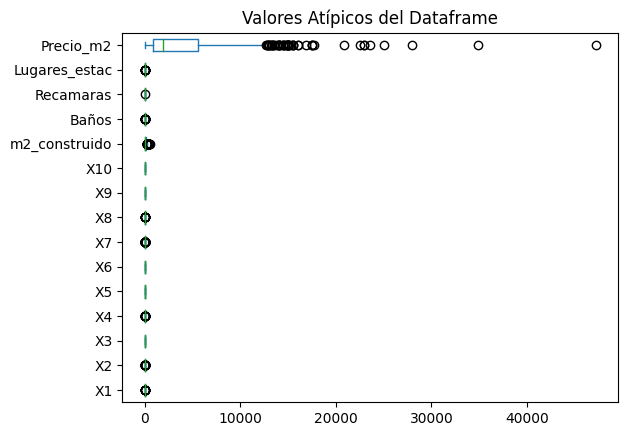

In [47]:
#Cercas Tukey 
fig = plt.figure(figsize =(15, 8))
df.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() 

Tenemos un valor de 120,000 en la variable "Precio_m2", se decide que para realizar un análisis mas adecuado tendremos que eliminar este valor fuera de rango.

In [48]:
Conglomerado = Conglomerado[(Conglomerado["Precio_m2"]< 120000)]
df = df[(df["Precio_m2"]< 120000)]

<Figure size 1500x800 with 0 Axes>

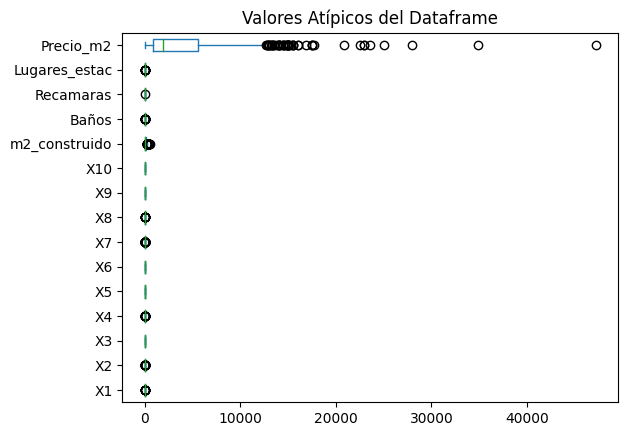

In [49]:
#Cercas Tukey 
fig = plt.figure(figsize =(15, 8))
df.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() 

1. Elección de la ubicación. En esta etapa me parece que la variable que mejor describe esta categoría es "Precio_m2", el precio del inmueble está directamente ligado con la ubicación.  
2. Variables escenciales. Hace referencia a los requerimentos que necesita una vivienda para vivir cómodamente, ejemplo de esto es "m2_construido".


In [34]:
# Elección del conglomerado
Conglomerado = df.iloc[ : , [18,22]]
Conglomerado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658 entries, 0 to 657
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   m2_construido  658 non-null    float64
 1   Precio_m2      658 non-null    float64
dtypes: float64(2)
memory usage: 10.4 KB


# 3. METODOLOGÍA SIMILITUD O DISTANCIA.

Utilizamos la distancia euclidiana, la cual busca calcular la similitud de la distancia entre los datos.

In [36]:
# Dejamos el código declarado solo de manera representativa.

#Código utilizado de la clase "Análisis de conglomerados".
#Código realizado con la ayuda de ChatGPT
# Función para calcular la distancia euclidiana entre dos filas
#def euclidean_distance(row1, row2):
    #return np.sqrt(np.sum((row1 - row2) ** 2))

# Crear una matriz de distancias euclidianas
#distances = np.zeros((len(Conglomerado), len(Conglomerado)))

#for i in range(len(Conglomerado)):
    #for j in range(i, len(Conglomerado)):
       # dist = euclidean_distance(Conglomerado.iloc[i], Conglomerado.iloc[j])
       # distances[i, j] = dist
       # distances[j, i] = dist  # La matriz es simétrica, por lo que llenamos ambos lados

# Crear un DataFrame de distancias
#distance_clusters = pd.DataFrame(distances, index=Conglomerado.index, columns=Conglomerado.index)

#distance_clusters #ahora contiene las distancias euclidianas entre todas las filas de tu DataFrame

# 4. PROCEDIMIENTO DE AGRUPAMIENTO.

En este caso decidimos realizar el procedimiento k-means ya que catalogamos la naturaleza de la información para realizar un análisis no jerárquico, los principales componentes se enfocan en:
- No realizamos una estructura de clustering jerárquicas.
- Dividiremos cada punto de datos en grupos sin considerar la existencia de clusters dentro de otros clusters.

# 5. DECIDIR NÚMERO DE CONGLOMERADOS.

Para esta técnica utilizaremos la metodología del codo, además, nos apoyaremos en una segunda opinión llevando a cabo un gráfico dendograma.

c:\Users\Carlos Casillas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Carlos Casillas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Carlos Casillas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Carlos Casillas\AppData\Local\Programs\Python\

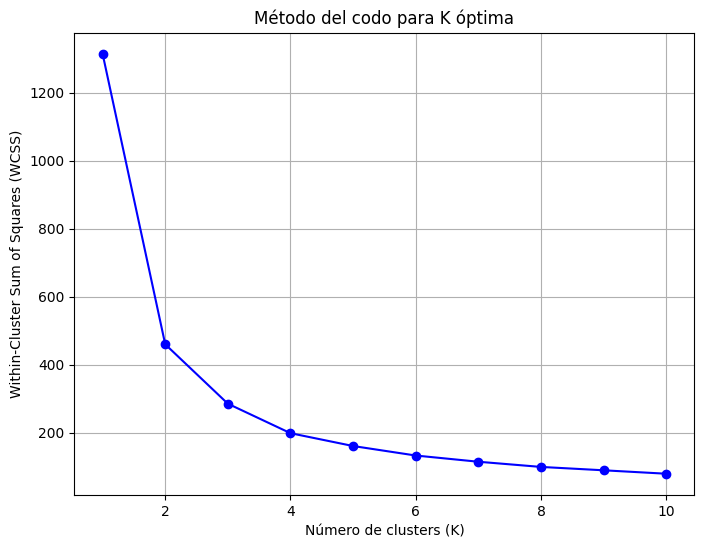

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Se estandarizan los valores
scaler = StandardScaler()
X = scaler.fit_transform(Conglomerado)

# Se calcula el wcss (Suma de cuadrados de las distancias intra-cluster)
# se almacena el valor en la lista wcss
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Se grafica la curva.
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Método del codo para K óptima')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

La técnica del codo define que el número ideal de clusters (donde existe la mayor homogeneidad internamnete y mayor diferencia entre clusters) es de 4.

In [38]:
#Dendograma
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

# Estandarización (esto afecta si no se realiza)
scaler = StandardScaler()
X_std = scaler.fit_transform(Conglomerado)

In [39]:
# se realiza el clustering con la función linkage
linked = linkage(X_std, method='ward') #como podrán observar, son las distancias

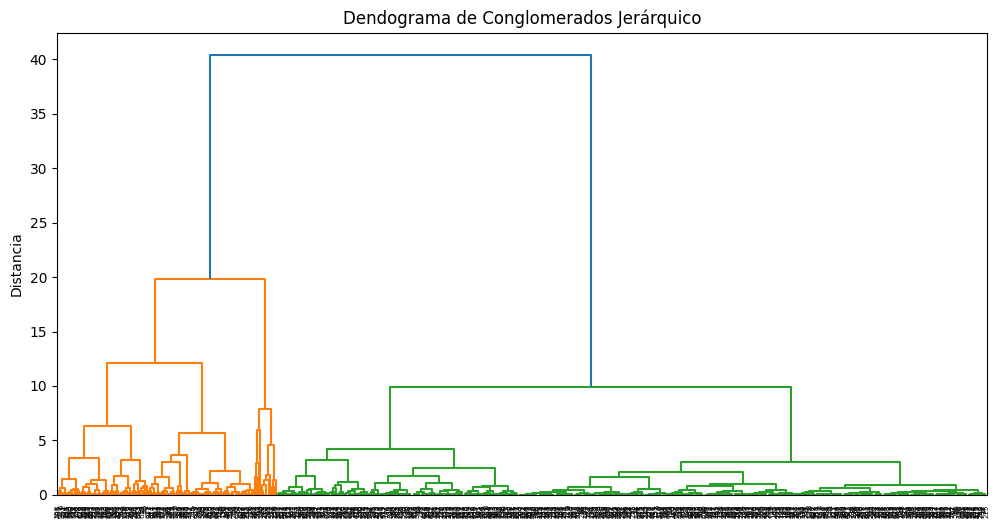

In [40]:
# Create a dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z=linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendograma de Conglomerados Jerárquico')
plt.ylabel('Distancia')
plt.show()

# 6. INTERPRETAR Y ELABORAR UN PERFIL DE CONGLOMERADOS.

In [41]:
from sklearn.cluster import AgglomerativeClustering


clustering_model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
clustering_model.fit(Conglomerado[['Precio_m2','m2_construido' ]])
clustering_model.labels_

c:\Users\Carlos Casillas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 2, 3, 2, 2, 2, 3, 1, 1, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 1,
       2, 3, 1, 1, 2, 2, 2, 2, 1, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 1, 2,
       2, 2, 2, 3, 2, 1, 2, 3, 2, 1, 1, 1, 3, 1, 0, 3, 2, 2, 1, 2, 2, 2,
       2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 3, 3, 3, 1, 1, 2, 1, 1, 2, 1,
       2, 1, 1, 1, 3, 2, 3, 3, 2, 2, 2, 3, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 1, 3, 1, 2, 2, 1, 2, 2, 2, 2, 2, 3, 2, 1, 2, 2, 1, 2, 1, 2, 2,
       1, 3, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 3, 2, 1, 2,
       2, 1, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 1, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2,
       1, 1, 2, 2, 2, 3, 0, 2, 1, 1, 2, 0, 1, 2, 3, 0, 1, 2, 2, 2, 3, 1,
       2, 2, 2, 1, 3, 2, 1, 2, 2, 2, 2, 2, 2, 2, 3, 1, 2, 2, 1, 1, 2, 2,
       2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 1, 1,
       1, 2, 3, 3, 2, 1, 3, 1, 1, 3, 1, 2, 1, 1, 2, 2, 3, 2, 2, 2, 2, 2,
       1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2,

<Axes: xlabel='Precio_m2', ylabel='m2_construido'>

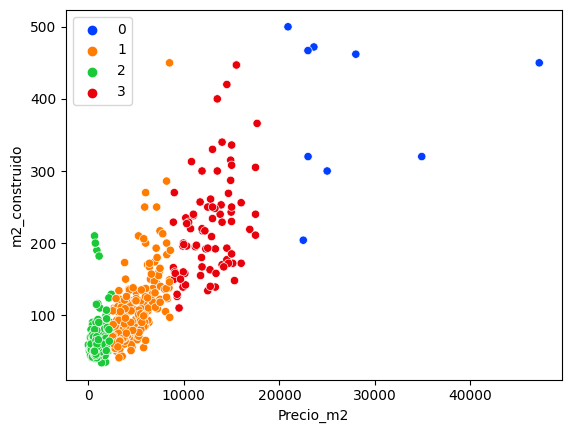

In [42]:
import seaborn as sns

data_labels = clustering_model.labels_
sns.scatterplot(x='Precio_m2',
                y='m2_construido',
                data=df,
                hue=data_labels,
                palette="bright")

In [43]:
cluster_results = df.copy()
cluster_results['Cluster Labels'] = clustering_model.labels_
### Esta línea nos da el resultado de la evaluación de una condición
cluster_results['Cluster Labels'] == 4
### Podemos usar este resultado para filtrar una serie.
cluster_4 = cluster_results.loc[cluster_results['Cluster Labels'] == 3]

<Axes: xlabel='Cluster Labels', ylabel='Precio_m2'>

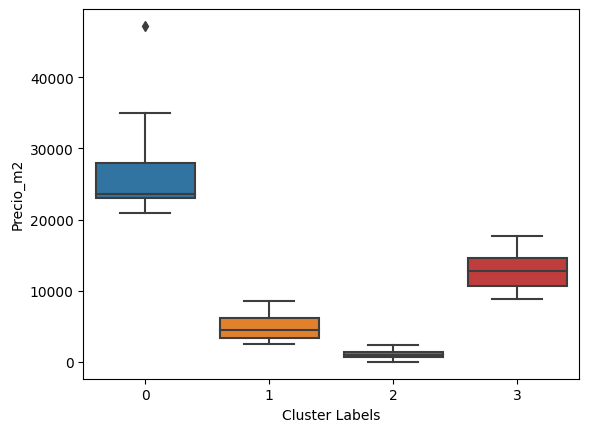

In [44]:
sns.boxplot(data=cluster_results, x="Cluster Labels", y="Precio_m2")

<Axes: xlabel='Cluster Labels', ylabel='Recamaras'>

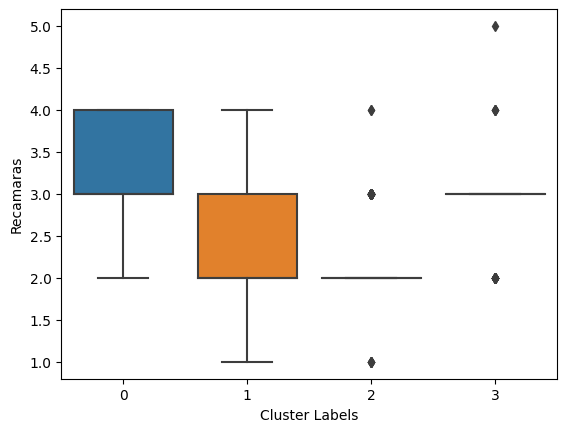

In [45]:
sns.boxplot(data=cluster_results, x="Cluster Labels", y="Recamaras")

<Axes: xlabel='Cluster Labels', ylabel='Lugares_estac'>

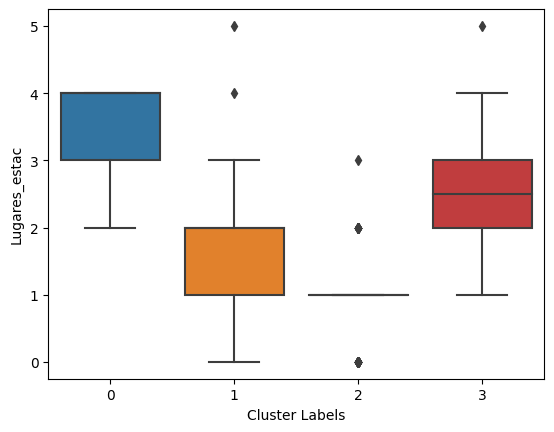

In [46]:
sns.boxplot(data=cluster_results, x="Cluster Labels", y="Lugares_estac")